Ref: https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering , https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

In [99]:
# Importing libraries and packages

#general
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [100]:
# Input data
df = pd.read_csv('/content/VIXKalbeClustering_aggregated.csv', decimal=",")
df.head(5)

,customerid,gender,age,Marital Status,income,BanyakTransaksi,TotalQuantity,TotalAmount,ProdukFavorit
0,1,1,55,Married,5.12,17,60,623300,Cheese Stick
1,2,1,60,Married,6.23,13,57,392300,Thai Tea
2,3,1,32,Married,9.17,15,56,446200,Crackers
3,4,1,31,Married,4.87,10,46,302500,Crackers
4,5,1,58,Married,3.57,7,27,268600,Potato Chip


# EDA

In [101]:
df.shape

(447, 9)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       447 non-null    int64  
 1   gender           447 non-null    int64  
 2   age              447 non-null    int64  
 3   Marital Status   444 non-null    object 
 4   income           447 non-null    float64
 5   BanyakTransaksi  447 non-null    int64  
 6   TotalQuantity    447 non-null    int64  
 7   TotalAmount      447 non-null    int64  
 8   ProdukFavorit    447 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 31.6+ KB


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 1200x600 with 0 Axes>

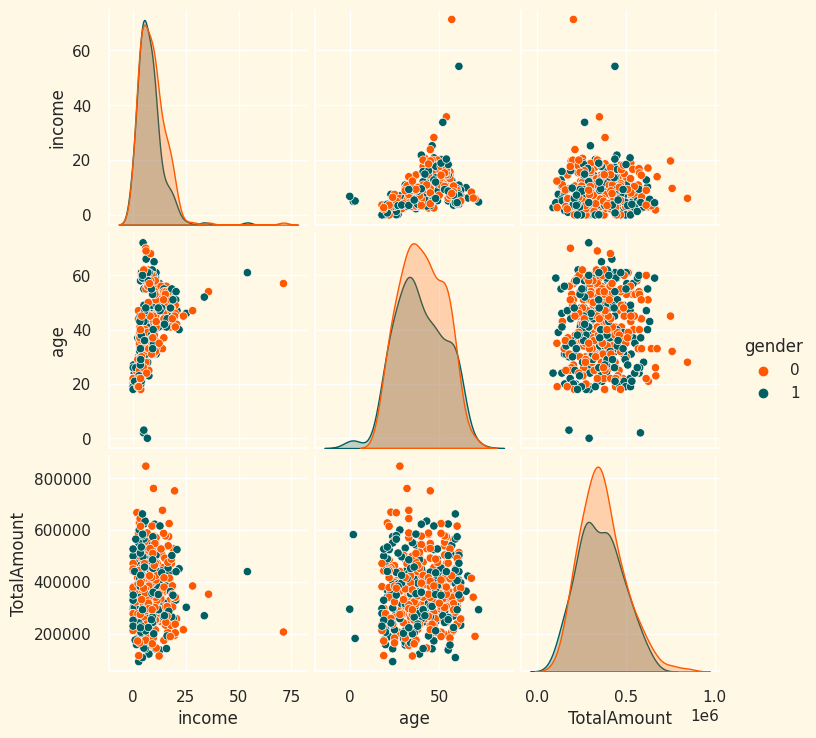

In [103]:
# Visualizing some selected features
sns.set(rc={"axes.facecolor":"#FFF8E5","figure.facecolor":"#FFF8E5"})
pallet = ["#FD5901","#F78104","#FAAB36","#249EA0","#008083","#005F60"]
cmap = colors.ListedColormap(pallet)

To_Plot = [ "income", "gender", "age", "TotalAmount"]
print("Reletive Plot Of Some Selected Features: A Data Subset")

plt.figure()
sns.pairplot(df[To_Plot], hue= "gender",palette= (["#FD5901","#005F60"]))
plt.show()

<Axes: >

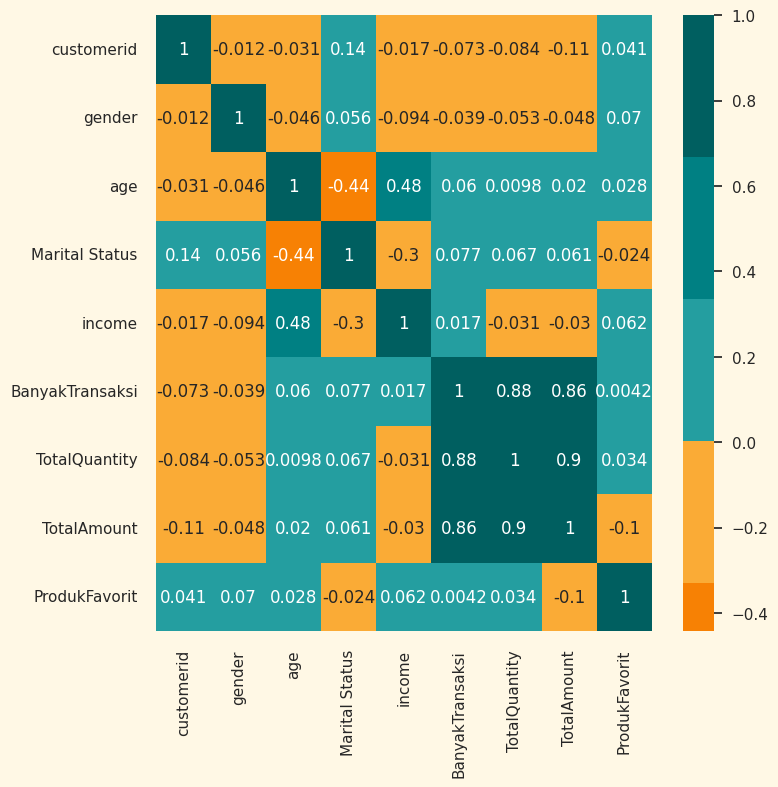

In [104]:
# Correlation matrix
corrmat= df_copy.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

# Data Preprocessing

**(1) Data Cleaning**

In [105]:
# Checking missing values
df.isnull().sum()

customerid         0
gender             0
age                0
Marital Status     3
income             0
BanyakTransaksi    0
TotalQuantity      0
TotalAmount        0
ProdukFavorit      0
dtype: int64

There are 3 rows with missing values in 'Marital Status' columns. Assuming that these customers prefer not to say their marital status but they still need to be assigned to a cluster, then the missing values will be left as it is.

**(2) Data Transformation**

In [106]:
df_copy = df.copy()

In [107]:
# Listing categorical columns
s = (df_copy.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Marital Status', 'ProdukFavorit']

In [108]:
# Label encoding categorical columns
LE=LabelEncoder()
for i in object_cols:
    df_copy[i]=df_copy[[i]].apply(LE.fit_transform)

In [109]:
df_copy.head(5)

,customerid,gender,age,Marital Status,income,BanyakTransaksi,TotalQuantity,TotalAmount,ProdukFavorit
0,1,1,55,0,5.12,17,60,623300,1
1,2,1,60,0,6.23,13,57,392300,8
2,3,1,32,0,9.17,15,56,446200,4
3,4,1,31,0,4.87,10,46,302500,4
4,5,1,58,0,3.57,7,27,268600,7


In [110]:
# Standardizing dataset with Z-score method
scaler = StandardScaler()
col_list = df_copy.columns.tolist()
df_copy[col_list] = scaler.fit_transform(df_copy[col_list])

In [111]:
df_copy.head(5)

,customerid,gender,age,Marital Status,income,BanyakTransaksi,TotalQuantity,TotalAmount,ProdukFavorit
0,-1.728180,1.086503,1.185648,-0.551713,-0.526102,1.779816,1.496527,2.094768,-1.136381
1,-1.720431,1.086503,1.575227,-0.551713,-0.357912,0.545884,1.261093,0.239269,1.346674
2,-1.712681,1.086503,-0.606420,-0.551713,0.087565,1.162850,1.182615,0.672218,-0.072214
3,-1.704931,1.086503,-0.684336,-0.551713,-0.563983,-0.379565,0.397833,-0.482047,-0.072214
4,-1.697182,1.086503,1.419395,-0.551713,-0.760963,-1.305014,-1.093251,-0.754347,0.991952


**(3) Dimensionality Reduction**

In [112]:
# Applying Principal Component Analysis
pca = PCA(n_components=0.99) #selecting number of components which explains 99% of the variance
pca.fit(df_copy)
PCA_ds = pd.DataFrame(pca.transform(df_copy), columns=(["col1","col2", "col3","col4","col5","col6","col7","col8"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,447.0,3.179162e-17,1.669150,-4.016113,-1.102912,-0.090586,1.126496,5.395277
col2,447.0,-3.179162e-17,1.363009,-3.346099,-0.745301,0.114067,1.089760,6.577575
col3,447.0,0.000000e+00,1.039198,-2.413770,-0.783245,-0.085532,0.717647,2.566608
col4,447.0,0.000000e+00,1.016955,-2.275633,-0.690983,-0.034259,0.779487,2.421979
col5,447.0,0.000000e+00,0.945840,-2.487946,-0.692261,-0.022883,0.714285,2.539181
col6,447.0,1.589581e-17,0.817646,-1.575168,-0.572287,-0.091987,0.471020,5.960210
col7,447.0,-1.390883e-17,0.684561,-2.619753,-0.334583,0.072342,0.438754,3.585919
col8,447.0,-1.192186e-17,0.378166,-1.210281,-0.222085,-0.003639,0.249885,1.268277


# K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

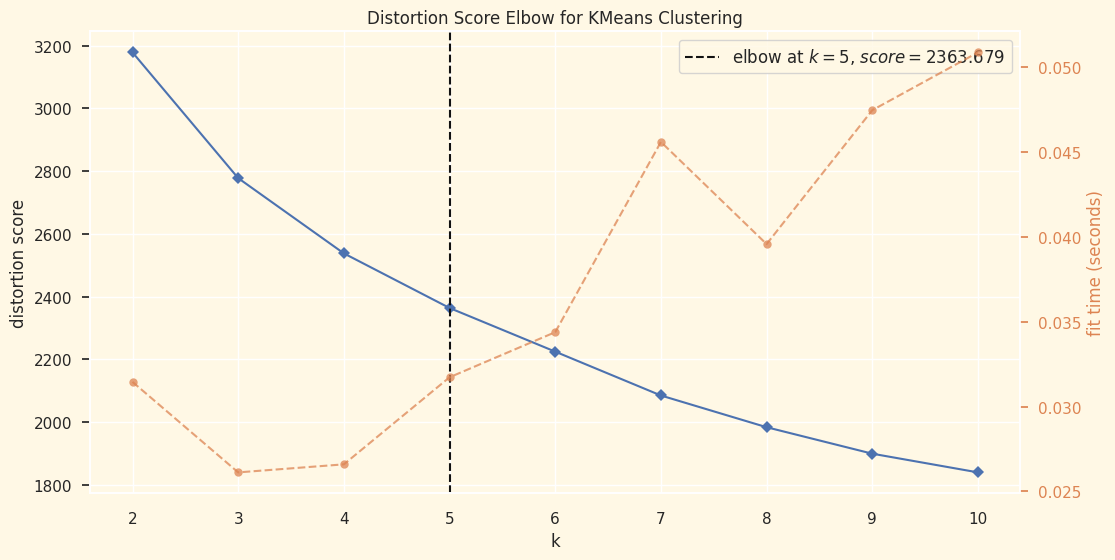

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
# Selecting number of cluster with Elbow method
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [114]:
# K-means clustering with selected number of clusters
AC = KMeans(n_clusters=5)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Adding the 'Clusters' feature to the orignal dataframe.
df["Clusters"]= yhat_AC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


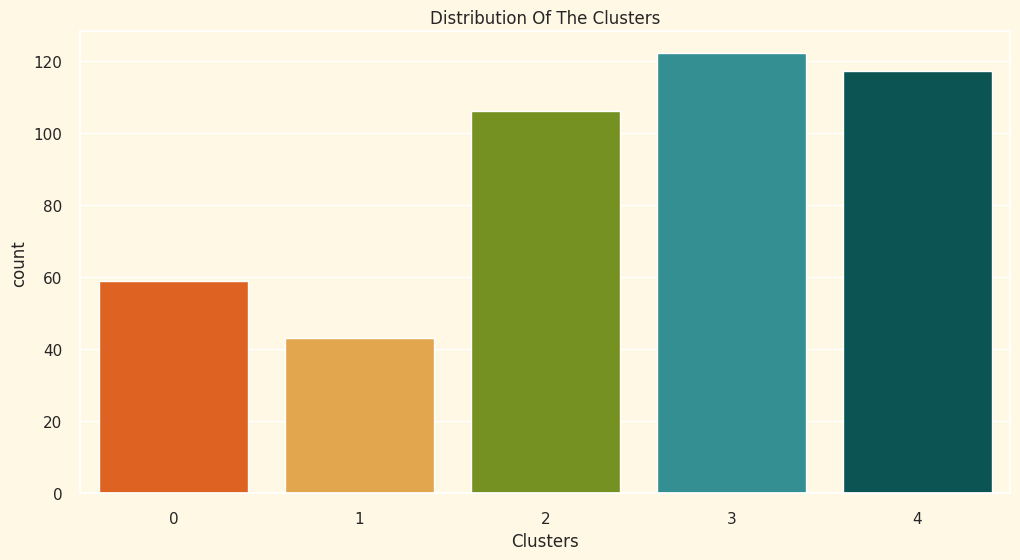

In [115]:
# Plotting countplot of clusters
pal = ["#FD5901","#FAAB36","#7EA310","#249EA0","#005F60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

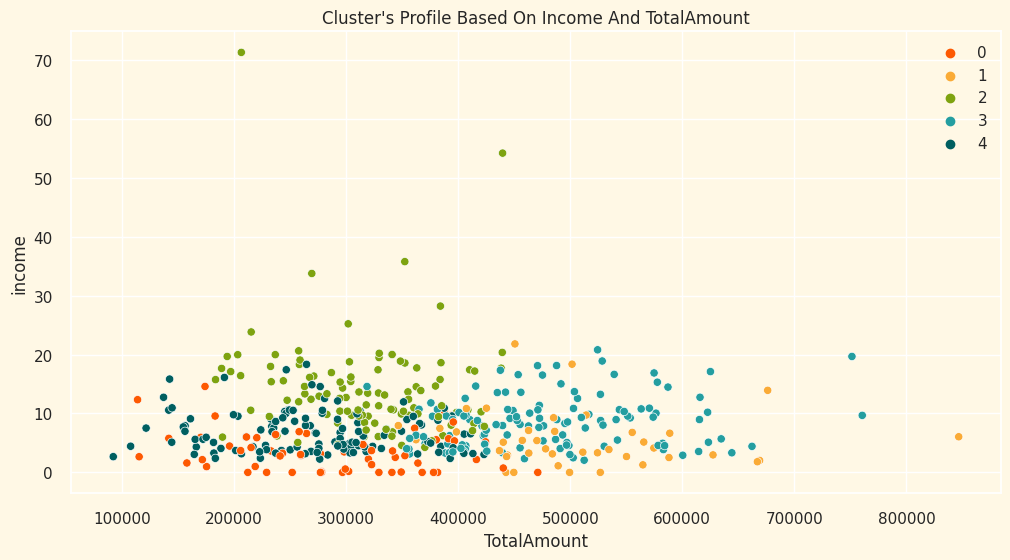

In [116]:
pl = sns.scatterplot(data = df,x=df["TotalAmount"], y=df["income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And TotalAmount")
plt.legend()
plt.show()

# Cluster Profiling

Considering previous graph, it can be concluded that there are 5 clusters with following characteristics based on income and spending amount:
* Low income, low to medium spending (cluster 0)
* Low to medium income, low to medium spending (cluster 4)
* Medium to high income, medium spending (cluster 2)
* Low income, high spending (cluster 1)
* Medium income, high spending (cluster 3)

Therefore we will be focusing on characteristics of clusters with high spending (cluster 1 & 3)

**Cluster 1**

In [122]:
df_target1 = df[df['Clusters'] == 1 ]
df_target1.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,43.0,234.558140,137.361064,10.0,116.00,240.00,356.000,443.00
gender,43.0,0.418605,0.499169,0.0,0.00,0.00,1.000,1.00
age,43.0,30.069767,9.871545,19.0,22.50,26.00,35.000,59.00
income,43.0,5.718140,4.624876,0.0,2.81,5.12,7.295,21.81
BanyakTransaksi,43.0,14.790698,1.909352,11.0,14.00,15.00,16.000,20.00
TotalQuantity,43.0,54.860465,8.573440,40.0,47.50,53.00,62.000,75.00
TotalAmount,43.0,502081.395349,96591.797581,346500.0,442900.00,485100.00,552750.000,846700.00
Clusters,43.0,1.000000,0.000000,1.0,1.00,1.00,1.000,1.00


In [123]:
df_target1.describe(exclude=np.number).T

,count,unique,top,freq
Marital Status,40,1,Single,40
ProdukFavorit,43,9,Cheese Stick,12


In [124]:
df_target1['gender'].value_counts()

0    25
1    18
Name: gender, dtype: int64

In [125]:
df_target1['ProdukFavorit'].value_counts()

Cheese Stick     12
Thai Tea         11
Crackers          7
Yoghurt           3
Coffee Candy      3
Ginger Candy      3
Choco Bar         2
Oat               1
Potato Chip       1
Name: ProdukFavorit, dtype: int64

**Cluster 3**

In [126]:
df_target3 = df[df['Clusters'] == 3 ]
df_target3.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,122.0,195.688525,131.836681,1.00,83.2500,173.000,297.2500,445.00
gender,122.0,0.434426,0.497725,0.00,0.0000,0.000,1.0000,1.00
age,122.0,42.196721,11.397868,2.00,34.0000,40.000,51.0000,66.00
income,122.0,8.721967,4.356041,2.07,4.8575,8.805,10.7125,20.81
BanyakTransaksi,122.0,14.254098,2.180156,10.00,13.0000,14.000,16.0000,21.00
TotalQuantity,122.0,53.491803,8.160828,37.00,48.2500,53.000,58.0000,79.00
TotalAmount,122.0,480642.622951,85498.981598,318600.00,411625.0000,472200.000,530025.0000,760600.00
Clusters,122.0,3.000000,0.000000,3.00,3.0000,3.000,3.0000,3.00


In [127]:
df_target3.describe(exclude=np.number).T

,count,unique,top,freq
Marital Status,122,1,Married,122
ProdukFavorit,122,10,Thai Tea,21


In [129]:
df_target3['gender'].value_counts()

0    69
1    53
Name: gender, dtype: int64

In [130]:
df_target3['ProdukFavorit'].value_counts()

Thai Tea         21
Cheese Stick     20
Crackers         18
Coffee Candy     18
Choco Bar        13
Yoghurt           8
Oat               7
Ginger Candy      7
Cashew            6
Potato Chip       4
Name: ProdukFavorit, dtype: int64